In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Read image (grayscale)
img = cv2.imread("lena.jpeg", 0)
#cv2.IMREAD_GRAYSCALE

In [16]:
# 1. Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)   # X direction
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)   # Y direction
sobel = cv2.magnitude(sobelx, sobely)                # Combine

In [17]:
# 2. Prewitt Edge Detection (manual kernel)
# Define Prewitt kernels
kernelx = np.array([[-1,0,1], 
                    [-1,0,1], 
                    [-1,0,1]])
kernely = np.array([[1,1,1], 
                    [0,0,0], 
                    [-1,-1,-1]])

prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)
prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

In [18]:
# 3. Canny Edge Detection
# Thresholds can be tuned (e.g., 100, 200)
canny = cv2.Canny(img, 100, 200)

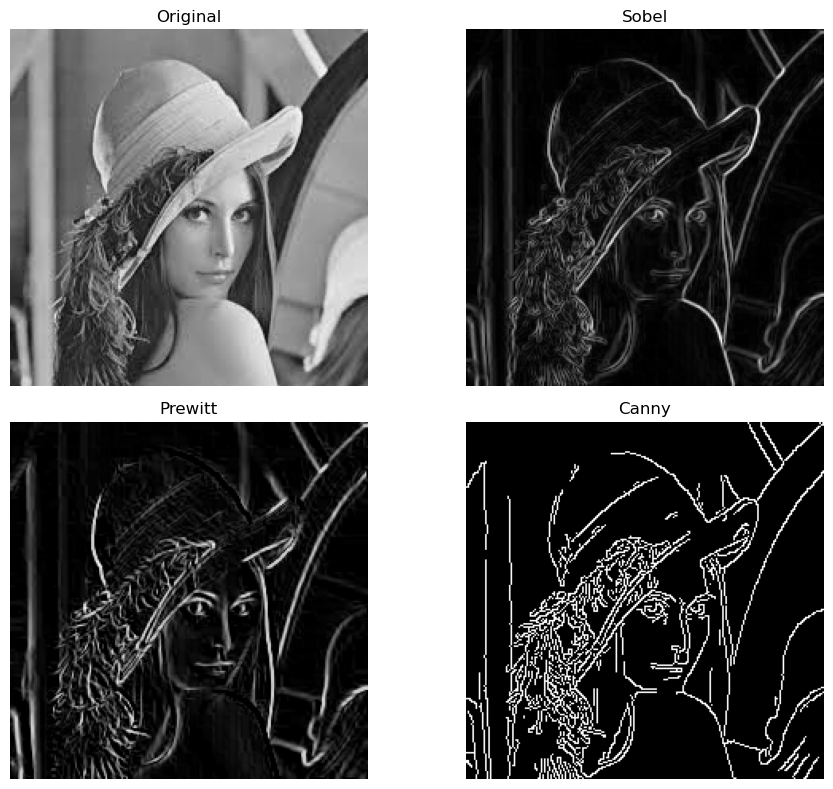

In [19]:
# Show Results
titles = ['Original', 'Sobel', 'Prewitt', 'Canny']
images = [img, sobel, prewitt, canny]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()